# EFC2
Regressão Logística Binária para o conjunto de dados de voz divido em gêneros masculino e feminino

In [14]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.metrics as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [15]:
dados = genfromtxt('dados_voz_genero.csv', delimiter=',')

In [16]:
dados = dados[1:,:] #remove cabeçalho
print(dados)

[[0.06424127 0.03202691 0.01507149 ... 0.         0.         1.        ]
 [0.06731003 0.04022874 0.01941387 ... 0.046875   0.05263158 1.        ]
 [0.08382942 0.03671846 0.00870106 ... 0.0078125  0.04651163 1.        ]
 ...
 [0.09579843 0.18373124 0.03342387 ... 2.9296875  0.19475862 0.        ]
 [0.09062826 0.18497617 0.0435081  ... 3.5859375  0.31100218 0.        ]
 [0.09288354 0.18304392 0.0700715  ... 0.546875   0.35       0.        ]]


In [17]:
# função para o cálculo do RMSE
def rmse(y, yhat):
    return np.sqrt( np.power(y - yhat, 2).mean() )

In [18]:
# cria as matrizes X e y sendo 20% dos dados para teste e o restante para treino
X = dados[:,:-1] #remove a última coluna de 0 e 1's
y = dados[:,-1:] #seleciona somente a última coluna
y = y.ravel()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# regressão logística pela biblioteca SkLearn
logreg = LogisticRegression(max_iter=3500)
logreg.fit(Xtrain, ytrain)
ypred = logreg.predict(Xtest)

print("Root Mean Square Error:",rmse(ytest,ypred))
print("Score:",logreg.score(Xtest,ytest))

Root Mean Square Error: 0.29453486829836145
Score: 0.9132492113564669


In [20]:
# matriz de confusão para threshold = 0.5
cmatrix = sk.confusion_matrix(ytest,ypred)
print(cmatrix)

[[257  44]
 [ 11 322]]


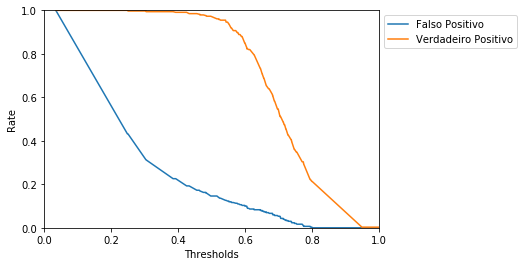

In [21]:
# curva ROC
# fpr = falso positivo
# tpr = verdadeiro positivo
fpr, tpr, thresholds = roc_curve(ytest, logreg.predict_proba(Xtest)[:,1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.plot(thresholds,fpr,label='Falso Positivo')
plt.plot(thresholds,tpr,label = 'Verdadeiro Positivo')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

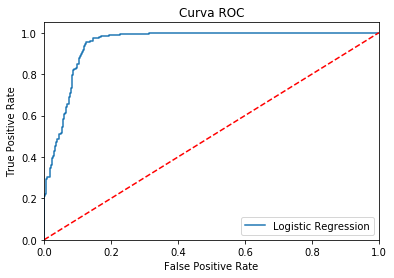

In [22]:
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [23]:
# melhor valor para threshold a partir da média geométrica
geo = np.sqrt(tpr * (1-fpr))
index_geo = np.argmax(geo)
print('Best Threshold = %f' % thresholds[index_geo])

Best Threshold = 0.541986


In [24]:
# predição com o valor ótimo encontrado para threshold
ypred1 = (logreg.predict_proba(Xtest)[:,1] >= 0.541986).astype(int)

print("Root Mean Square Error:",rmse(ytest,ypred1))

Root Mean Square Error: 0.2918449958064847


In [25]:
cmatrix1 = sk.confusion_matrix(ytest,ypred1)
print(cmatrix1)

[[263  38]
 [ 16 317]]


Text(0.5, 1, 'Accuracy Score: 0.9132')

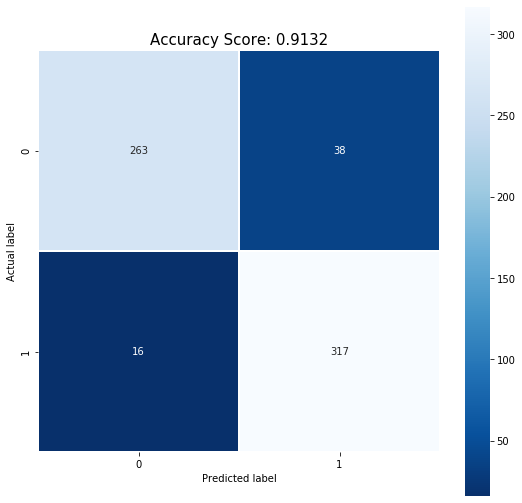

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(logreg.score(Xtest, ytest))
plt.title(all_sample_title, size = 15)